#Movie Genre Prediction

In [ ]:
#importing the necessary libaries
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the data set
df= pd.read_csv('/content/drive/MyDrive/wow/kaggle_movie_train.csv')

In [ ]:
df.head()  #1st five rows

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [ ]:
df.tail(20)  #last 20 rows

,id,text,genre
22559,28145,UMP Screwball! You dolt! I've a mind to change...,romance
22560,28146,eading for the street. Patrons linger in the c...,drama
22561,28147,his truckers watch them go. MERLIN grumbles Wh...,drama
22562,28148,edge in the kingdom! The GUARDS drag the ADVIS...,comedy
22563,28149,EarthLink reg Page Not Found Residential Busi...,drama
22564,28150,criminals of the world ever end up behind bars...,drama
22565,28151,ling them. Pooch taste tests dog biscuits for ...,thriller
22566,28152,"BUT THEN YOU KNEW THAT. Inhaling some bliss, S...",action
22567,28153,ck in the cab. EXT. STREET MED. SHOT HILDY at ...,drama
22568,28155,"eps forward, her heel catches and she pitches ...",drama


In [ ]:
df.shape  #rows =22579  #columns = 3

(22579, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


In [ ]:
# check for null values in the dataset
print(df.isnull().sum())

id       0
text     0
genre    0
dtype: int64


In [ ]:
duplicate=df.duplicated()  #identifying duplicate rows in the dataset
sum(duplicate)  #total number of duplicate rows

0

In [ ]:
#finding the count of different genres
df['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [ ]:
#converting text to number
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df.genre)

In [ ]:
df['target']= labels  #creating new column "target" to store the numeric values of genre
df

,id,text,genre,target
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,8
1,2,"t, summa cum laude and all. And I'm about to l...",comedy,2
2,3,"up Come, I have a surprise.... She takes him ...",drama,3
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller,8
4,5,"nd dismounts, just as the other children reach...",drama,3
...,...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama,3
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama,3
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller,8
22577,28165,....with marked skill and dexterity . LANA wry...,action,0


***Genres***....<br>
0-action <br>
1-adventure<br>
2-comedy<br>
3-drama<br>
4-horror<br>
5-other<br>
6-romance<br>
7-sci-fi<br>
8-thriller<br>

In [ ]:
df['target'].value_counts()

3    8873
8    6824
2    2941
0    2392
7     613
4     456
5     270
1     147
6      63
Name: target, dtype: int64

In [ ]:
#libraries for preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')  #downloading stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#streaming
port_stem = PorterStemmer()

In [ ]:
def streamming(text):
  stremmed_content = re.sub('[^a-zA-Z]',' ',text)
  stremmed_content = stremmed_content.lower()
  stremmed_content = stremmed_content.split()
  stremmed_content = [port_stem.stem(word) for word in stremmed_content if not word in stopwords.words('english')]
  stremmed_content = ' '.join(stremmed_content)
  return stremmed_content

In [ ]:
df['text'] =df['text'].apply(streamming)

In [ ]:
print(df['text'])

0        eadi dead mayb even wish int nd floor hallway ...
1        summa cum laud launch brand new magazin call e...
2        come surpris take hand lead hallway salvator l...
3        ded two detect int jeff apart night medium sho...
4        nd dismount children reach throw arm embrac ch...
                               ...                        
22574    n world decid go think think emili decid go ch...
22575    shard bojo laz laz push deke back joint slam o...
22576    otti got thing erni judi well place come bathr...
22577    mark skill dexter lana wryli surpris mani offe...
22578    rd walk hallway leav post end hallway see beav...
Name: text, Length: 22579, dtype: object


In [ ]:
X = df['text'].values
Y = df['target'].values
print(X)
print(Y)

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work'
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v guess

In [ ]:
#converting textual data to feature vector(feature extraction)
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 40984)	0.040727155133009056
  (0, 40802)	0.06314219276093436
  (0, 40782)	0.06477696928989521
  (0, 40714)	0.041713960523212815
  (0, 40635)	0.06657560558562355
  (0, 40485)	0.09471834182836072
  (0, 40208)	0.059664570445265304
  (0, 40116)	0.05460825981397819
  (0, 39971)	0.03317250280416727
  (0, 39926)	0.042848328304470516
  (0, 37538)	0.03552603564856327
  (0, 36721)	0.13083604290798026
  (0, 35528)	0.04483311364792022
  (0, 34972)	0.05747906614832185
  (0, 34924)	0.03574205149224875
  (0, 34744)	0.04062206311216977
  (0, 34622)	0.033926677945272765
  (0, 34546)	0.033200380477817995
  (0, 33835)	0.06454870733030273
  (0, 33079)	0.05993214747150558
  (0, 32433)	0.04674959690355588
  (0, 32103)	0.025558375226269976
  (0, 30827)	0.07090473055981203
  (0, 30812)	0.06241827150403815
  (0, 29568)	0.04443759958321907
  :	:
  (22578, 15826)	0.09525684585196828
  (22578, 15211)	0.04097181038593338
  (22578, 14815)	0.045002171572757675
  (22578, 14377)	0.15063086914203486
  (22578, 138

In [ ]:
#spliting the dataset into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
#random state - split in same way
#80% training data  20% test data

In [ ]:
#coverting target values to integer
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

# Model Building

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score, classification_report

## Random Forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 80)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
random_forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=80)

In [ ]:
#accuracy score on training data
X_train_prediction = random_forest.predict(X_train)
train_accuracy =accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('accuracy score on training data:  ',train_accuracy)

accuracy score on training data:   1.0


In [ ]:
#accuracy score on test data
X_test_prediction = random_forest.predict(X_test)
test_accuracy =accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('accuracy score on test data:  ',test_accuracy)

accuracy score on test data:   0.6738263950398583


In [ ]:
# Print classification report
print('Classification Report on test data:')
print(classification_report(Y_test, X_test_prediction))

Classification Report on test data:
              precision    recall  f1-score   support

           0       0.99      0.44      0.61       477
           1       0.96      0.76      0.85        29
           2       0.99      0.36      0.53       591
           3       0.61      0.90      0.73      1790
           4       1.00      0.05      0.10        91
           5       0.96      0.57      0.72        47
           6       1.00      0.33      0.50         9
           7       1.00      0.19      0.33       113
           8       0.68      0.68      0.68      1369

    accuracy                           0.67      4516
   macro avg       0.91      0.48      0.56      4516
weighted avg       0.75      0.67      0.65      4516



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score on test data
precision = precision_score(X_test_prediction, Y_test, average='weighted')
recall = recall_score(X_test_prediction, Y_test, average='weighted')
f1 = f1_score(X_test_prediction, Y_test, average='weighted')

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.778072557606652
Recall: 0.6738263950398583
F1 Score: 0.6954564080916797


## KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #knn classifier
knn = KNeighborsClassifier(n_neighbors=10) #k=10

In [ ]:
knn.fit(X_train, Y_train) #training the model

KNeighborsClassifier(n_neighbors=10)

In [ ]:
#accuracy score on training data
X_train_prediction = knn.predict(X_train)
train_accuracy =accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('accuracy score on training data:  ',train_accuracy)

accuracy score on training data:   0.9478491944859658


In [ ]:
#accuracy score on test data
X_test_prediction = knn.predict(X_test)
test_accuracy =accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('accuracy score on test data:  ',test_accuracy)

accuracy score on test data:   0.9231620903454384


In [ ]:
# Print classification report
print('Classification Report on test data:')
print(classification_report(Y_test, X_test_prediction))

Classification Report on test data:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       477
           1       1.00      1.00      1.00        29
           2       0.91      0.90      0.90       591
           3       0.93      0.94      0.94      1790
           4       0.88      0.77      0.82        91
           5       0.89      0.85      0.87        47
           6       0.80      0.89      0.84         9
           7       0.84      0.87      0.86       113
           8       0.93      0.93      0.93      1369

    accuracy                           0.92      4516
   macro avg       0.90      0.90      0.90      4516
weighted avg       0.92      0.92      0.92      4516



In [ ]:
# Calculate precision, recall, and F1 score on test data
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(X_test_prediction, Y_test, average='weighted')
recall = recall_score(X_test_prediction, Y_test, average='weighted')
f1 = f1_score(X_test_prediction, Y_test, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.923683489550733
Recall: 0.9231620903454384
F1 Score: 0.923322781474557


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Initialize and train the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
#accuracy score on training data
X_train_prediction = clf.predict(X_train)
train_accuracy =accuracy_score(X_train_prediction,Y_train)
print('accuracy score on training data:  ',train_accuracy)

accuracy score on training data:   0.7122294192548303


In [ ]:
#accuracy score on test data
X_test_prediction = clf.predict(X_test)
test_accuracy =accuracy_score(X_test_prediction,Y_test)
print('accuracy score on test data:  ',test_accuracy)

accuracy score on test data:   0.6908768821966342


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate precision, recall, and F1 score on test data
precision = precision_score(X_test_prediction, Y_test, average='weighted')
recall = recall_score(X_test_prediction, Y_test, average='weighted')
f1 = f1_score(X_test_prediction, Y_test, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9091440787694512
Recall: 0.6908768821966342
F1 Score: 0.7626208122888728


## SVM

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, Y_train) #training the model

SVC()

In [ ]:
#accuracy score on training data
X_train_prediction = svm_model.predict(X_train)
train_accuracy =accuracy_score(X_train_prediction,Y_train)

In [ ]:
#accuracy score on test data
X_test_prediction = svm_model.predict(X_test)
test_accuracy =accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('accuracy score on training data:  ',train_accuracy)
print('accuracy score on test data:  ',test_accuracy)

accuracy score on training data:   0.998228422742623
accuracy score on test data:   0.9154118689105403


In [ ]:
# Print classification report
print('Classification Report on test data:')
print(classification_report(Y_test, X_test_prediction))

Classification Report on test data:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       477
           1       1.00      0.79      0.88        29
           2       0.98      0.83      0.90       591
           3       0.88      0.98      0.93      1790
           4       1.00      0.55      0.71        91
           5       1.00      0.81      0.89        47
           6       1.00      0.56      0.71         9
           7       0.99      0.61      0.75       113
           8       0.91      0.95      0.93      1369

    accuracy                           0.92      4516
   macro avg       0.97      0.77      0.85      4516
weighted avg       0.92      0.92      0.91      4516



In [ ]:
# Calculate precision, recall, and F1 score on test data
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(X_test_prediction, Y_test, average='weighted')
recall = recall_score(X_test_prediction, Y_test, average='weighted')
f1 = f1_score(X_test_prediction, Y_test, average='weighted')

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9287989987217956
Recall: 0.9154118689105403
F1 Score: 0.917807376946651


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

# Train the Decision Tree classifier
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy score on training data
X_train_prediction = decision_tree.predict(X_train)
train_accuracy =accuracy_score(X_train_prediction,Y_train)

#accuracy score on test data
X_test_prediction = decision_tree.predict(X_test)
test_accuracy =accuracy_score(X_test_prediction,Y_test)

print('accuracy score on training data:  ',train_accuracy)
print('accuracy score on test data:  ',test_accuracy)

accuracy score on training data:   1.0
accuracy score on test data:   0.691762621789194


In [ ]:
# Print classification report
print('Classification Report on test data:')
print(classification_report(Y_test, X_test_prediction))

Classification Report on test data:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       477
           1       0.83      0.86      0.85        29
           2       0.72      0.65      0.68       591
           3       0.69      0.73      0.71      1790
           4       0.55      0.37      0.44        91
           5       0.73      0.79      0.76        47
           6       0.86      0.67      0.75         9
           7       0.65      0.50      0.57       113
           8       0.67      0.69      0.68      1369

    accuracy                           0.69      4516
   macro avg       0.71      0.66      0.68      4516
weighted avg       0.69      0.69      0.69      4516



In [ ]:
# Calculate precision, recall, and F1 score on test data
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(X_test_prediction, Y_test, average='weighted')
recall = recall_score(X_test_prediction, Y_test, average='weighted')
f1 = f1_score(X_test_prediction, Y_test, average='weighted')

In [ ]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6964930345535959
Recall: 0.691762621789194
F1 Score: 0.693151420302406


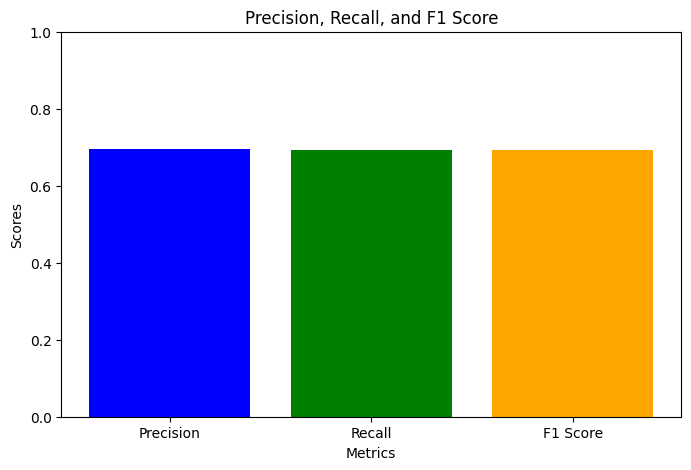

In [ ]:
# Plot the graph
import matplotlib.pyplot as plt
labels = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green', 'orange'])
plt.title('Precision, Recall, and F1 Score')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)
plt.show()

## Logistic Regression

In [ ]:
# Create a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='ovr', max_iter=1000)  # 'ovr' for One-vs-Rest

# Train the classifier
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
#accuracy score on training data
X_train_prediction = log_reg.predict(X_train)
train_accuracy =accuracy_score(X_train_prediction,Y_train)

#accuracy score on test data
X_test_prediction = log_reg.predict(X_test)
test_accuracy =accuracy_score(X_test_prediction,Y_test)

print('accuracy score on training data:  ',train_accuracy)
print('accuracy score on test data:  ',test_accuracy)

accuracy score on training data:   0.9374965398881692
accuracy score on test data:   0.8804251550044287


In [ ]:
# Print classification report
print('Classification Report on test data:')
print(classification_report(Y_test, X_test_prediction))

Classification Report on test data:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       477
           1       1.00      0.79      0.88        29
           2       0.98      0.78      0.87       591
           3       0.84      0.96      0.90      1790
           4       0.97      0.37      0.54        91
           5       0.97      0.66      0.78        47
           6       1.00      0.56      0.71         9
           7       1.00      0.52      0.69       113
           8       0.87      0.92      0.89      1369

    accuracy                           0.88      4516
   macro avg       0.96      0.71      0.79      4516
weighted avg       0.89      0.88      0.88      4516



In [ ]:
# Calculate precision, recall, and F1 score on test data
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(X_test_prediction, Y_test, average='weighted')
recall = recall_score(X_test_prediction, Y_test, average='weighted')
f1 = f1_score(X_test_prediction, Y_test, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9011308751006701
Recall: 0.8804251550044287
F1 Score: 0.8845935393565156


# PREDICTION MODEL

In [ ]:
X_new= X_test[0]
prediction = knn.predict(X_new)
print(prediction)
if(prediction[0]==0):
  print("action")
elif(prediction[0]==1):
  print("adventure")
elif(prediction[0]==2):
  print("comedy")
elif(prediction[0]==3):
  print("drama")
elif(prediction[0]==4):
  print("horror")
elif(prediction[0]==5):
  print("other")
elif(prediction[0]==6):
  print("romance")
elif(prediction[0]==7):
  print("sci-fi")
else:
  print("thriller")

[3]
drama


In [ ]:
print(Y_test[0])

3
